# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.


## Final Deliverables:

- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.


## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:

### **Exploratory Data Analysis for all Data Roles**

### Roles to Explore

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering for the Indian Data Analyst

In [3]:
df_DA_IN = df[(df["job_country"]=="India") & (df["job_title_short"]=="Data Analyst")]

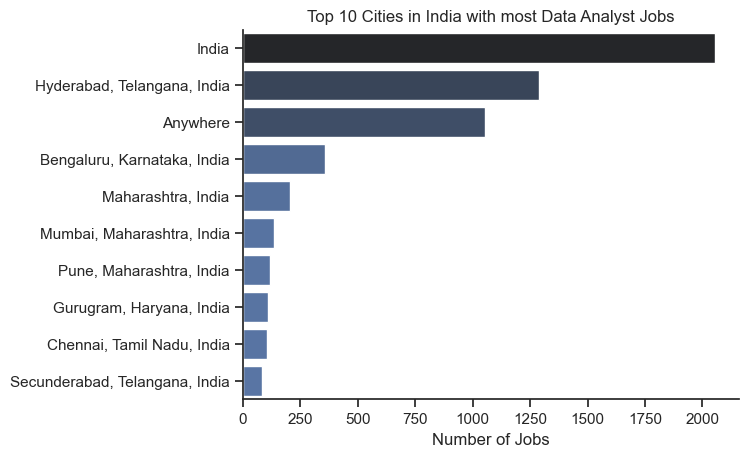

In [4]:
df_plot = df_DA_IN["job_location"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
plt.title("Top 10 Cities in India with most Data Analyst Jobs")
sns.barplot(data=df_plot,x="count",y ="job_location",hue ="count",palette="dark:b_r",legend=False)
plt.xlabel("Number of Jobs")
plt.ylabel("")
sns.despine()
plt.show()

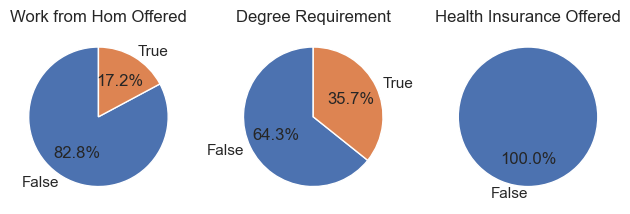

In [36]:

work_from_home = df_DA_IN['job_work_from_home'].value_counts()
job_no_degree = df_DA_IN['job_no_degree_mention'].value_counts()
job_health_insurance = df_DA_IN['job_health_insurance'].value_counts()

# Data Analyst Salaries
plt.subplot(1, 3, 1)
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(job_no_degree, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(job_health_insurance, labels=['False'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()

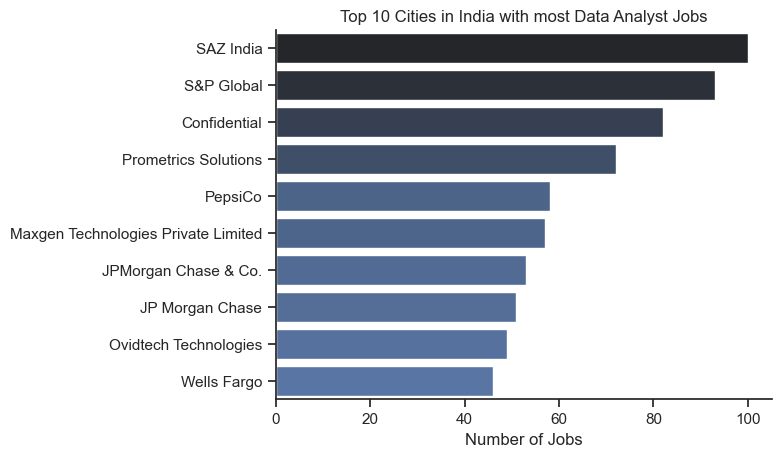

In [38]:
df_plot = df_DA_IN["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
plt.title("Top 10 Cities in India with most Data Analyst Jobs")
sns.barplot(data=df_plot,x="count",y ="company_name",hue ="count",palette="dark:b_r",legend=False)
plt.xlabel("Number of Jobs")
plt.ylabel("")
sns.despine()
plt.show()